# Yêu cầu:
- VIẾT TIẾP TRONG Lab03.02
* Viết lại bài Lab03.02 thành class, xây dựng pipeline áp dụng cho đồ thị mạng xã hội bất kỳ.
* TẠO MỚI Lab03.03
* Giới thiệu tổng quan về thuật toán louvain
* Tóm tắt tổng quan các chỉ số đánh giá việc phát hiện cộng đồng (công thức, phạm vi, như thế nào là tốt, .... )
* Thực hiện phân tích việc (nhận xét) phát hiện cộng đồng cho mạng xã hội tự chọn

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
from networkx.algorithms import cuts
import pandas as pd

In [3]:
# Load karate graph
G = nx.karate_club_graph()

In [4]:
# Girvan-Newman
girvan_newman_generator = community.girvan_newman(G)
# best_modularity = -1
# best_partition = None
# while True:
#     try:
#         current_partition = next(girvan_newman_generator)
#         current_modularity = community.modularity(G, current_partition)
#         if current_modularity > best_modularity:
#             best_modularity = current_modularity
#             best_partition = current_partition
#     except StopIteration:
#         break
# girvan_newman_partition = best_partition
girvan_newman_partition = max(girvan_newman_generator, key=lambda partition: community.modularity(G, partition))

In [5]:
# Label Propagation
label_propagation_partition = community.label_propagation_communities(G)

In [6]:
# Detect communities using different methods
# Louvain (using alternative)
louvain_partition = list(community.louvain_communities(G))

In [7]:
# Add function to calculate metrics
def calculate_metrics(G, communities):
    metrics = {
        'num_communities': len(communities),
        'modularity': community.modularity(G, communities),
        'conductance': np.mean([cuts.conductance(G, c) for c in communities]),
        'normalized_cut': np.mean([cuts.normalized_cut_size(G, c) for c in communities])
    }
    return metrics

In [8]:
def create_community_node_colors(graph, communities):
    node_colors = []
    for node in graph:
        for idx, comm in enumerate(communities):
            if node in comm:
                node_colors.append(plt.cm.jet(idx / len(communities)))
                break
    return node_colors

def visualize_communities(graph, communities, title, ax):
    node_colors = create_community_node_colors(graph, communities)
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    modularity = community.modularity(graph, communities)

    ax.set_title(f"{title}\n{len(communities)} communities (Modularity: {modularity:.3f})")
    nx.draw(graph, pos=pos, node_size=500, node_color=node_colors,
            with_labels=True, font_size=10, ax=ax)

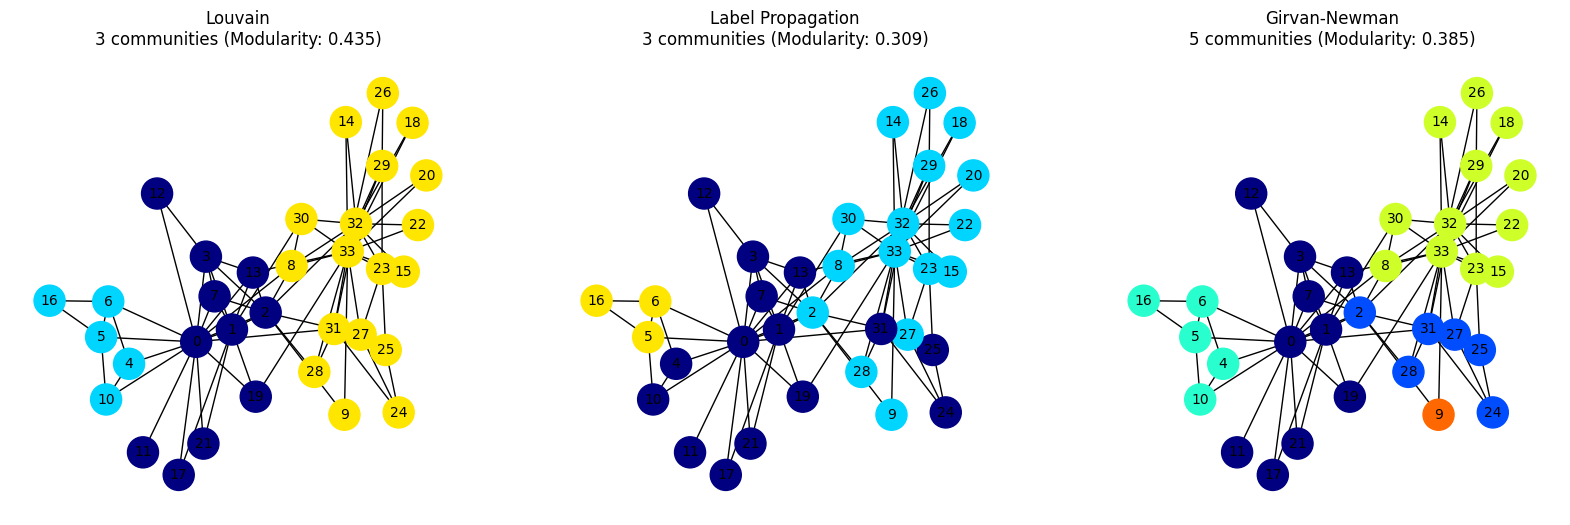

In [9]:
# Plot communities
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

visualize_communities(G, louvain_partition, "Louvain", axes[0])
visualize_communities(G, label_propagation_partition, "Label Propagation", axes[1])
visualize_communities(G, girvan_newman_partition, "Girvan-Newman", axes[2])

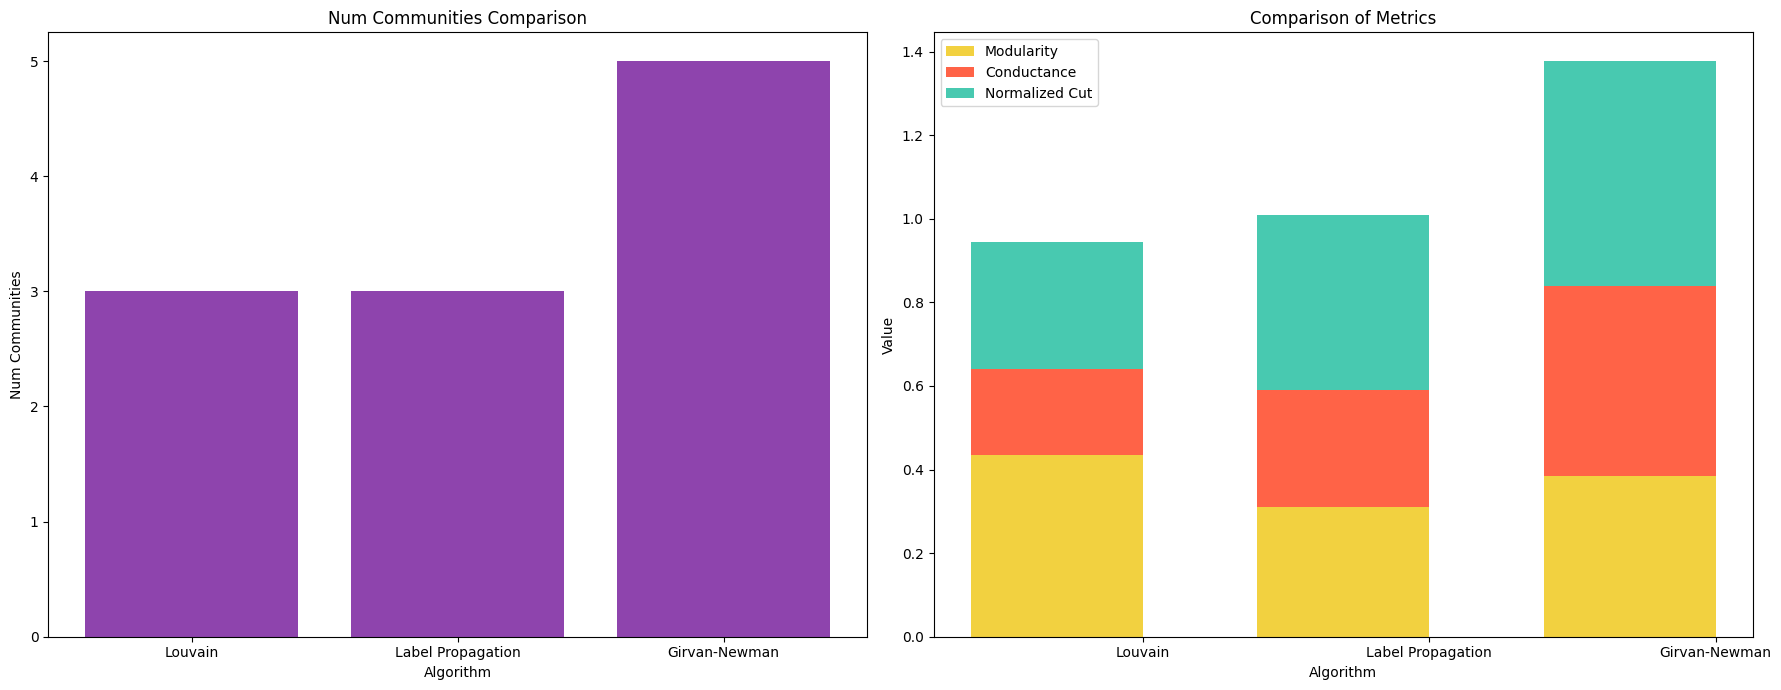

In [10]:
# Create DataFrame for metrics comparison
metrics_data = []
algorithms = ["Louvain", "Label Propagation", "Girvan-Newman"]

for partition, algorithm in zip([louvain_partition, label_propagation_partition, girvan_newman_partition], algorithms):
    metrics = calculate_metrics(G, partition)
    metrics_data.append({
        'Algorithm': algorithm,
        'Num Communities': metrics['num_communities'],
        'Modularity': metrics['modularity'],
        'Conductance': metrics['conductance'],
        'Normalized Cut': metrics['normalized_cut']
    })

metrics_df = pd.DataFrame(metrics_data)

# Plot the comparison of metrics
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Bar chart for comparing 'Num Communities' between algorithms
axes[0].bar(metrics_df['Algorithm'], metrics_df['Num Communities'], color="#8E44AD")
axes[0].set_title("Num Communities Comparison")
axes[0].set_xlabel("Algorithm")
axes[0].set_ylabel("Num Communities")

# Bar chart for comparing Modularity, Conductance, and Normalized Cut for each algorithm
bar_width = 0.6  # Increase the width of the bars
x = np.arange(len(metrics_df['Algorithm']))  # X positions for each algorithm

axes[1].bar(x - bar_width/2, metrics_df['Modularity'], width=bar_width, label='Modularity', color="#F2D140")
axes[1].bar(x - bar_width/2, metrics_df['Conductance'], width=bar_width, label='Conductance', color="#FF6347", bottom=metrics_df['Modularity'])
axes[1].bar(x - bar_width/2, metrics_df['Normalized Cut'], width=bar_width, label='Normalized Cut', color="#48C9B0", bottom=metrics_df['Modularity'] + metrics_df['Conductance'])

axes[1].set_title("Comparison of Metrics")
axes[1].set_xlabel("Algorithm")
axes[1].set_ylabel("Value")
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_df['Algorithm'])
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Build all the def to class pipeline
class community_analyze():
    def __init__(self, G):
        self.G = G
    def calculate_metrics(self, G, communities):
        metrics = {
            'num_communities': len(communities),
            'modularity': community.modularity(G, communities),
            'conductance': np.mean([cuts.conductance(G, c) for c in communities]),
            'normalized_cut': np.mean([cuts.normalized_cut_size(G, c) for c in communities])
        }
        return metrics


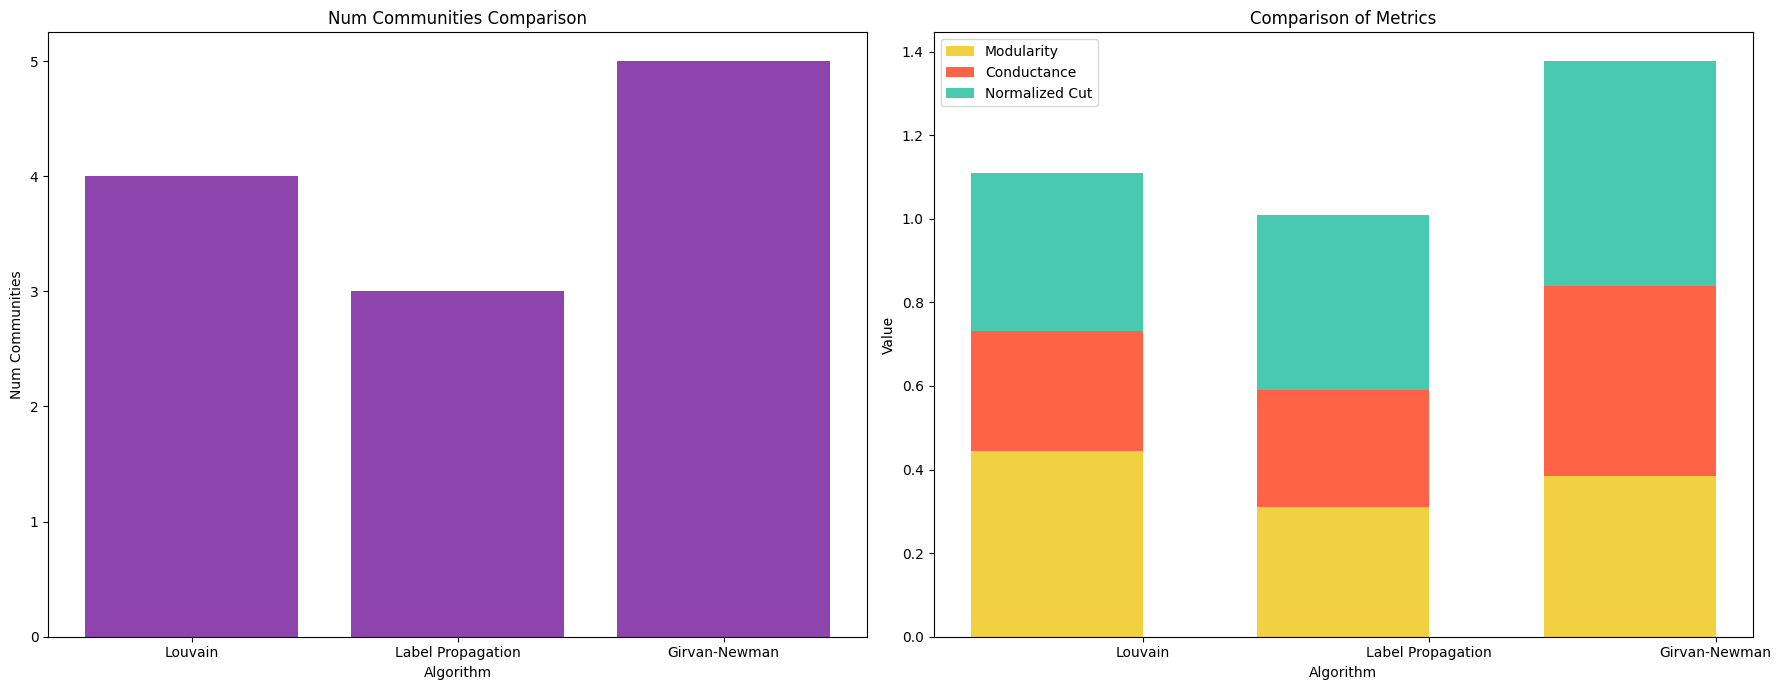

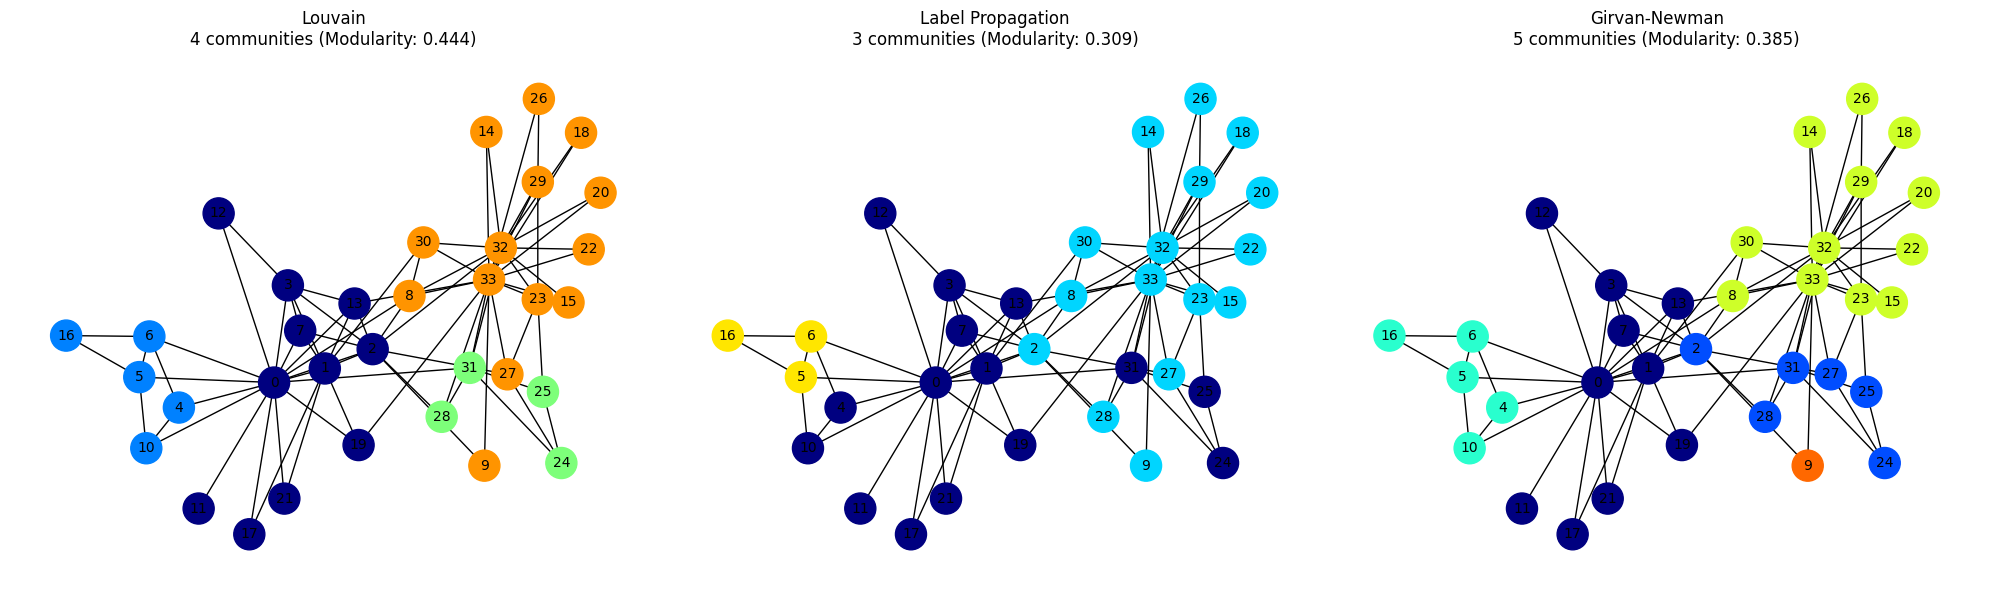

In [11]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import community
from networkx.algorithms.cuts import conductance, normalized_cut_size

class CommunityDetection:
    def __init__(self, graph):
        self.graph = graph
        self.partitions = {}
        self.metrics_df = None

    def detect_communities(self):
        # Louvain
        self.partitions['Louvain'] = list(community.louvain_communities(self.graph))
        # Label Propagation
        self.partitions['Label Propagation'] = list(community.label_propagation_communities(self.graph))
        # Girvan-Newman
        girvan_newman_generator = community.girvan_newman(self.graph)
        self.partitions['Girvan-Newman'] = max(girvan_newman_generator, key=lambda partition: community.modularity(self.graph, partition))

    def calculate_metrics(self, communities):
        return {
            'num_communities': len(communities),
            'modularity': community.modularity(self.graph, communities),
            'conductance': np.mean([conductance(self.graph, c) for c in communities]),
            'normalized_cut': np.mean([normalized_cut_size(self.graph, c) for c in communities])
        }

    def create_community_node_colors(self, communities):
        node_colors = []
        for node in self.graph:
            for idx, comm in enumerate(communities):
                if node in comm:
                    node_colors.append(plt.cm.jet(idx / len(communities)))
                    break
        return node_colors

    def visualize_communities(self, title, ax, communities):
        node_colors = self.create_community_node_colors(communities)
        pos = nx.spring_layout(self.graph, k=0.3, iterations=50, seed=2)
        modularity = community.modularity(self.graph, communities)

        ax.set_title(f"{title}\n{len(communities)} communities (Modularity: {modularity:.3f})")
        nx.draw(self.graph, pos=pos, node_size=500, node_color=node_colors,
                with_labels=True, font_size=10, ax=ax)

    def generate_metrics_comparison(self):
        metrics_data = []
        for algorithm, communities in self.partitions.items():
            metrics = self.calculate_metrics(communities)
            metrics_data.append({
                'Algorithm': algorithm,
                'Num Communities': metrics['num_communities'],
                'Modularity': metrics['modularity'],
                'Conductance': metrics['conductance'],
                'Normalized Cut': metrics['normalized_cut']
            })
        self.metrics_df = pd.DataFrame(metrics_data)

    def plot_metrics(self):
        if self.metrics_df is None:
            raise ValueError("Metrics have not been generated. Call generate_metrics_comparison() first.")

        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        # Bar chart for comparing 'Num Communities' between algorithms
        axes[0].bar(self.metrics_df['Algorithm'], self.metrics_df['Num Communities'], color="#8E44AD")
        axes[0].set_title("Num Communities Comparison")
        axes[0].set_xlabel("Algorithm")
        axes[0].set_ylabel("Num Communities")

        # Bar chart for comparing Modularity, Conductance, and Normalized Cut for each algorithm
        bar_width = 0.6  # Increase the width of the bars
        x = np.arange(len(self.metrics_df['Algorithm']))  # X positions for each algorithm

        axes[1].bar(x - bar_width/2, self.metrics_df['Modularity'], width=bar_width, label='Modularity', color="#F2D140")
        axes[1].bar(x - bar_width/2, self.metrics_df['Conductance'], width=bar_width, label='Conductance', color="#FF6347", bottom=self.metrics_df['Modularity'])
        axes[1].bar(x - bar_width/2, self.metrics_df['Normalized Cut'], width=bar_width, label='Normalized Cut', color="#48C9B0", bottom=self.metrics_df['Modularity'] + self.metrics_df['Conductance'])

        axes[1].set_title("Comparison of Metrics")
        axes[1].set_xlabel("Algorithm")
        axes[1].set_ylabel("Value")
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(self.metrics_df['Algorithm'])
        axes[1].legend()

        plt.tight_layout()
        plt.show()

    def visualize_all_communities(self):
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        for ax, (algorithm, communities) in zip(axes, self.partitions.items()):
            self.visualize_communities(algorithm, ax, communities)
        plt.tight_layout()
        plt.show()

# Example usage:
G = nx.karate_club_graph()
community_detector = CommunityDetection(G)
community_detector.detect_communities()
community_detector.generate_metrics_comparison()
community_detector.plot_metrics()
community_detector.visualize_all_communities()
